<a href="https://colab.research.google.com/github/jambdeep/SALLE-FAyD-2022/blob/main/220523/FILTROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

In [2]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

In [3]:
# Requerimientos del filtro
order = 20
fs = 30.0       # frecuencia de muestreo, Hz
cutoff_low = 3.667  # frecuencia de corte deseada del filtro, Hz

In [4]:
# Obtención de coeficientes
b, a = butter_lowpass(cutoff_low, fs, order)

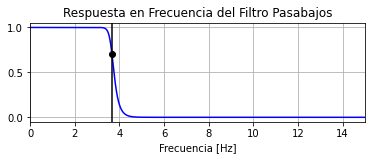

In [5]:
plt.figure(1)
# Gráfica de respuesta en frecuencia.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff_low, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff_low, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Respuesta en Frecuencia del Filtro Pasabajos")
plt.xlabel('Frecuencia [Hz]')
plt.grid()

In [6]:
# Demostración del filtro
T = 4.0         # segundos
n = int(T * fs) # total de muestras
t = np.linspace(0, T, n, endpoint=False)
# Datos con ruido, se quiere recuperar la señal de 1.2Hz
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(6*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

In [7]:
# Filtrado de datos 
y = butter_lowpass_filter(data, cutoff_low, fs, order)

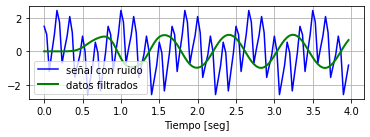

In [8]:
plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='señal con ruido')
plt.plot(t, y, 'g-', linewidth=2, label='datos filtrados')
plt.xlabel('Tiempo [seg]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.35)
plt.show()

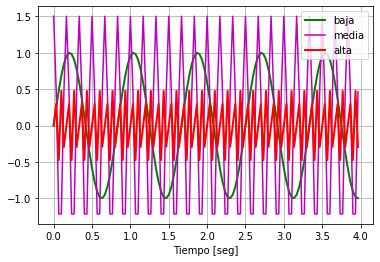

In [9]:
# Gráfica de los componentes de la señal 
plt.figure(2)
plt.plot(t, np.sin(1.2*2*np.pi*t) , 'g-', linewidth=2, label='baja')
plt.plot(t, 1.5*np.cos(6*2*np.pi*t), 'm-',  label='media')
plt.plot(t, 0.5*np.sin(12.0*2*np.pi*t), 'r-',linewidth=2, label='alta')
plt.xlabel('Tiempo [seg]')
plt.grid()
plt.legend()
plt.show()

In [10]:
#===============
# Requerimientos del filtro
order = 6
fs = 30.0       # frecuencia de muestreo, Hz
cutoff_high = 10  # frecuencia de corte deseada del filtro, Hz

In [11]:
# Obtención de coeficientes
b, a = butter_highpass(cutoff_high, fs, order)

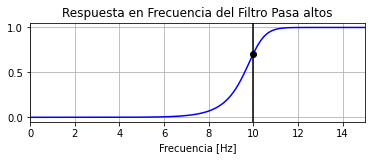

In [12]:
plt.figure(3)
# Gráfica de respuesta en frecuencia.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff_high, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff_high, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Respuesta en Frecuencia del Filtro Pasa altos")
plt.xlabel('Frecuencia [Hz]')
plt.grid()

In [13]:
# Demostración del filtro
T = 5.0         # segundos
n = int(T * fs) # total de muestras
t = np.linspace(0, T, n, endpoint=False)
# Datos con ruido, se quiere recuperar la señal de 12 Hz
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(6*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

In [14]:
# Filtrado de datos 
y = butter_highpass_filter(data, cutoff_high, fs, order)

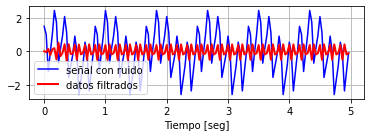

In [15]:
plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='señal con ruido')
plt.plot(t, y, 'r-', linewidth=2, label='datos filtrados')
plt.xlabel('Tiempo [seg]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.35)
plt.show()

In [16]:
#===============
# Requerimientos del filtro
order = 6
fs = 30.0       # frecuencia de muestreo, Hz
lowcut = 4  # frecuencia de muestreo inferior deseada, Hz 
highcut = 8  # frecuencia de muestreo superior deseada, Hz 

In [17]:
# Obtención de coeficientes
b, a = butter_bandpass(lowcut, highcut, fs, order)

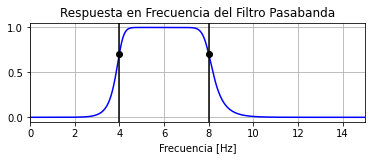

In [18]:
plt.figure(4)
# Gráfica de respuesta en frecuencia.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut, 0.5*np.sqrt(2), 'ko')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Respuesta en Frecuencia del Filtro Pasabanda")
plt.xlabel('Frecuencia [Hz]')
plt.grid()

In [19]:
# Demostración del filtro
T = 5.0         # segundos
n = int(T * fs) # total de muestras
t = np.linspace(0, T, n, endpoint=False)
# Datos con ruido, se quiere recuperar la señal de 6 Hz
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(6*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

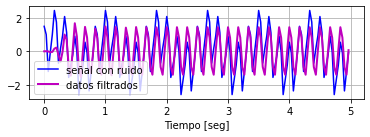

In [20]:
# Filtrado de datos 
y = butter_bandpass_filter(data, lowcut, highcut, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='señal con ruido')
plt.plot(t, y, 'm-', linewidth=2, label='datos filtrados')
plt.xlabel('Tiempo [seg]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()